In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('/Users/adonismaomao/Data sets/ft_us_bank/data.csv')

/Users/adonismaomao/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df.iloc[0]

id                                                                       1077501
member_id                                                                1296599
loan_amnt                                                                   5000
funded_amnt                                                                 5000
funded_amnt_inv                                                             4975
term                                                                   36 months
int_rate                                                                   10.65
installment                                                               162.87
grade                                                                          B
sub_grade                                                                     B2
emp_title                                                                    NaN
emp_length                                                             10+ years
home_ownership              

In [21]:
df.describe().T

/Users/adonismaomao/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:4269: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,count,mean,std,min,25%,50%,75%,max
id,887379.0,3.246513e+07,2.282734e+07,54734.00,9.206643e+06,3.443327e+07,5.490814e+07,6.861706e+07
member_id,887379.0,3.500182e+07,2.411335e+07,70473.00,1.087713e+07,3.709528e+07,5.847135e+07,7.354484e+07
loan_amnt,887379.0,1.475526e+04,8.435456e+03,500.00,8.000000e+03,1.300000e+04,2.000000e+04,3.500000e+04
funded_amnt,887379.0,1.474188e+04,8.429898e+03,500.00,8.000000e+03,1.300000e+04,2.000000e+04,3.500000e+04
funded_amnt_inv,887379.0,1.470246e+04,8.442107e+03,0.00,8.000000e+03,1.300000e+04,2.000000e+04,3.500000e+04
int_rate,887379.0,1.324674e+01,4.381867e+00,5.32,9.990000e+00,1.299000e+01,1.620000e+01,2.899000e+01
installment,887379.0,4.367171e+02,2.441866e+02,15.67,2.607050e+02,3.825500e+02,5.726000e+02,1.445460e+03
annual_inc,887375.0,7.502759e+04,6.469830e+04,0.00,NaN,NaN,NaN,9.500000e+06
dti,887379.0,1.815704e+01,1.719063e+01,0.00,1.191000e+01,1.765000e+01,2.395000e+01,9.999000e+03
delinq_2yrs,887350.0,3.144419e-01,8.622438e-01,0.00,NaN,NaN,NaN,3.900000e+01


In [34]:
# to see if member_ids are unique
len(set(df.member_id))==len(df.member_id)

True

In [15]:
# Looking at the type of grades being assigned
df['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [17]:
df['sub_grade'].unique()

array(['B2', 'C4', 'C5', 'C1', 'B5', 'A4', 'E1', 'F2', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F4', 'F1', 'E5', 'G4', 'E2', 'G3', 'G2', 'G1',
       'F5', 'G5'], dtype=object)

In [23]:
sum(df.loan_amnt), sum(df.funded_amnt), sum(df.funded_amnt_inv)

(13093511950.0, 13081632625.0, 13046658141.926006)

In [38]:
#Last total payment amount received - amount of loan 
sum(df.last_pymnt_amnt)-sum(df.loan_amnt)

-11173094604.521759

In [41]:
#Payments received to date - total amount funded
sum(df.total_pymnt)-sum(df.funded_amnt)

-6374088561.2964535

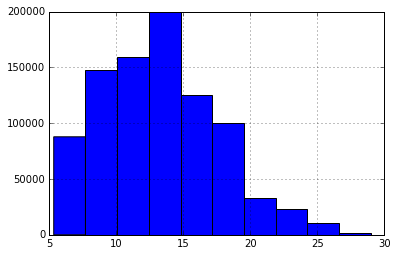

In [27]:
df.int_rate.hist()

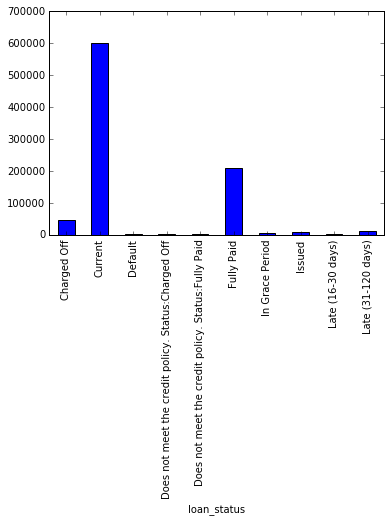

In [36]:
df.groupby('loan_status').count()['id'].plot.bar()

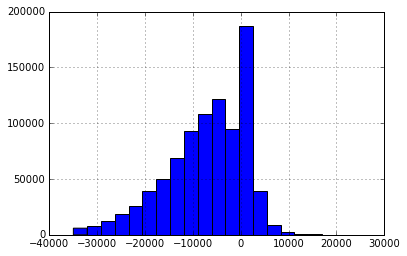

In [44]:
(df.total_pymnt-df.funded_amnt).hist(bins=20)

In [62]:
#create new feature
df['profit'] = df.total_pymnt-df.funded_amnt
df['issue_y'] = df.issue_d.apply(lambda x: x[-4:])

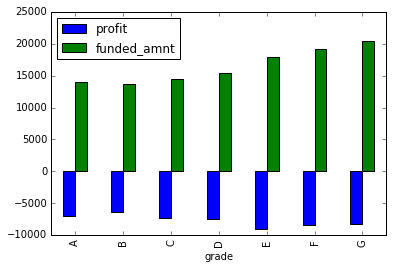

In [55]:
df.groupby('grade').mean()[['profit', 'funded_amnt']].plot.bar()

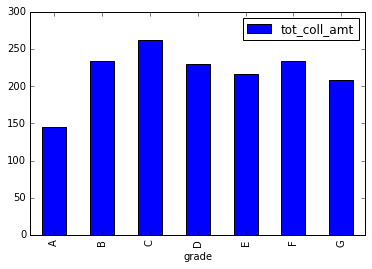

In [54]:
#Total collection amounts ever owed
df.groupby('grade').mean()[['tot_coll_amt']].plot.bar()

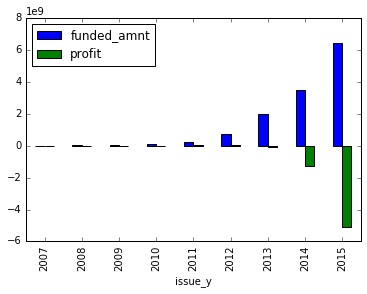

In [66]:
df.groupby('issue_y').sum()[['funded_amnt', 'profit']].plot.bar()